Random Forest univariate model for the prediction of meteorological time series data, located in the district of Zurite, province of Anta in Cusco - Peru.

# **Autoregressive Random Forest for forecasting**
*Code used and applied from reference:*  **https://sarem-seitz.com/posts/forecasting-with-decision-trees-and-random-forests/**

## DATA WORK

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [20]:
#load the data
# location = '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME_SERIES-Andenes_Diario-13-23.csv'
location='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Diario-13-23.csv'
# location = '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING TESIS/TIME-SERIES-Mensual-86-23.csv'
data= pd.read_csv(location, parse_dates=['Fecha'],infer_datetime_format=True)
data.head()

<ipython-input-20-10d772ce0006>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data= pd.read_csv(location, parse_dates=['Fecha'],infer_datetime_format=True)


,Año,Mes,Dia,Fecha,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad
0,2013,Ene,1,2013-01-01,12.038,18.022,7.344,0.956,73.676
1,2013,Ene,2,2013-01-02,12.224,18.000,8.078,3.600,74.553
2,2013,Ene,3,2013-01-03,11.902,17.822,7.667,9.933,76.719
3,2013,Ene,4,2013-01-04,10.906,16.778,7.122,8.800,79.117
4,2013,Ene,5,2013-01-05,11.146,16.267,7.211,4.956,79.746


In [21]:
#index the dataet using months
data=data.set_index(['Fecha'])
#Change header names
data = data.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad" })

# data = data.drop(["Año", "Dia", "Mes", "Temp_media", "Temp_min", "Precipitacion", "Pto rocio", "PresionBarom", "EnerSolar"], axis=1) # HUMEDAD DKATAFRAME
data = data.drop(["Año", "Dia", "Mes", "Temp_media", "Humedad", "Precipitacion", "Temp_min"], axis=1) # HUMEDAD DKATAFRAME
# data = data.drop(["Año", "Mes", "Temp_media", "Humedad", "Temp_min", "Precipitacion"], axis=1)# HUMEDAD DATAFRAME
data.head()

,Temp_max
Fecha,
2013-01-01,18.022
2013-01-02,18.000
2013-01-03,17.822
2013-01-04,16.778
2013-01-05,16.267


### DATA FEATURES (LAGS)

In [22]:
# Crear características de series temporales (lag)
def create_lag_features(data, n_lags):
    for lag in range(1, n_lags + 1):
        data[f'lag_{lag}'] = data['Temp_max'].shift(lag)
    return data

# Configurar el número de lags
n_lags = 15
data = create_lag_features(data, n_lags)
data.dropna(inplace=True)


# Agregar características estacionales
data['Month'] = data.index.month
data['Day_of_Week'] = data.index.dayofweek

# Separar características y etiquetas
X = data.drop('Temp_max', axis=1)
y = data['Temp_max']

## SPLIT DATA

In [23]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Verificación de las formas de los conjuntos de datos
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (3094, 17)
Forma de y_train: (3094,)
Forma de X_test: (774, 17)
Forma de y_test: (774,)


In [24]:
# # Configuración de la búsqueda de hiperparámetros
# param_grid = {
#     'n_estimators': [50, 100, 200, 500, 1000],
#     'max_depth': [5, 10, 20, 50, 100, None],
#     'min_samples_split': [2, 5, 10, 20, 30, 50, 100, 150],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'bootstrap': [True, False]
# }

# # Configuración del modelo de Random Forest
# rf = RandomForestRegressor(random_state=42)

# # RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
#                                n_iter=100, cv=3, verbose=2, random_state=None, n_jobs=-1)

# # Ajustar el modelo
# rf_random.fit(X_train, y_train)

# # Mejor estimador
# best_rf = rf_random.best_estimator_

# print("Mejores hiperparámetros:", rf_random.best_params_)

**DIARIOS** : Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 100, 'bootstrap': True}

**MENSUALES** : Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}

## MODEL BUILD

In [25]:
model = RandomForestRegressor(max_depth=5, n_estimators= 1000, min_samples_split= 30, min_samples_leaf= 4, bootstrap= True, oob_score=True)

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=30,
                      n_estimators=1000, oob_score=True)

### EVALUATIONS

In [27]:
# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluación de métricas
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluar en el conjunto de entrenamiento
rmse_train, mae_train, mape_train = evaluate_model(y_train, y_pred_train)

# Evaluar en el conjunto de prueba
rmse_test, mae_test, mape_test = evaluate_model(y_test, y_pred_test)

print(f'Entrenamiento - RMSE: {rmse_train:.5f}, MAE: {mae_train:.5f}, MAPE: {mape_train:.5f}%')
print(f'Prueba - RMSE: {rmse_test:.5f}, MAE: {mae_test:.5f}, MAPE: {mape_test:.5f}%')

Entrenamiento - RMSE: 1.59313, MAE: 1.22150, MAPE: 7.21228%
Prueba - RMSE: 1.73201, MAE: 1.31439, MAPE: 7.49048%


In [28]:
!ls '/content/drive/My Drive/Colab Notebooks/THESIS MODELS ML'

'ANALYZE DATA'	'EXPONENTIAL SMOOTHING'  'RANDOM FOREST'   'RNN - LSTM'     XGBOOST
 ARIMA		'--- PROPHET'		 '--- REGRESSION'  '---  RNN MLP'


### SAVE MODEL

In [29]:
# from google.colab import drive
# import shutil
# import os

# # Ruta del notebook actual
# current_notebook_name = 'Temp_max-UV-RF-opt.ipynb'
# notebook_path = '/content/drive/My Drive/Colab Notebooks/THESIS MODELS ML/RANDOM FOREST/' + current_notebook_name

# # Definir el nuevo nombre para el archivo
# new_notebook_name = 'RF_tmax_m_5.ipynb'  # Cambia esto según la versión o el nombre deseado

# # Ruta de destino en Google Drive (modificar según tus necesidades)
# destination_folder = '/content/drive/My Drive/Colab Notebooks/MACHINE LEARNING TESIS'

# # Crear la carpeta de destino si no existe
# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)

# # Ruta completa del archivo de destino con el nuevo nombre
# new_notebook_path = os.path.join(destination_folder, new_notebook_name)

# # Mover y renombrar el notebook a la carpeta de destino
# shutil.copy(notebook_path, new_notebook_path)

# print("Notebook guardado como:", new_notebook_path)

In [30]:
# import joblib
# import os

# # Definir la ruta de la carpeta donde guardarás el modelo
# carpeta_modelos = '/content/drive/My Drive/Colab Notebooks/MACHINE LEARNING TESIS'

# # Asegúrate de que la carpeta exista
# os.makedirs(carpeta_modelos, exist_ok=True)

# # Ruta completa del archivo
# ruta_modelo = os.path.join(carpeta_modelos, 'RF_pre_d_5.joblib')

# # Guardar el modelo
# joblib.dump(model, ruta_modelo)

# print(f"Modelo guardado exitosamente en: {ruta_modelo}")

## GRAPHICS

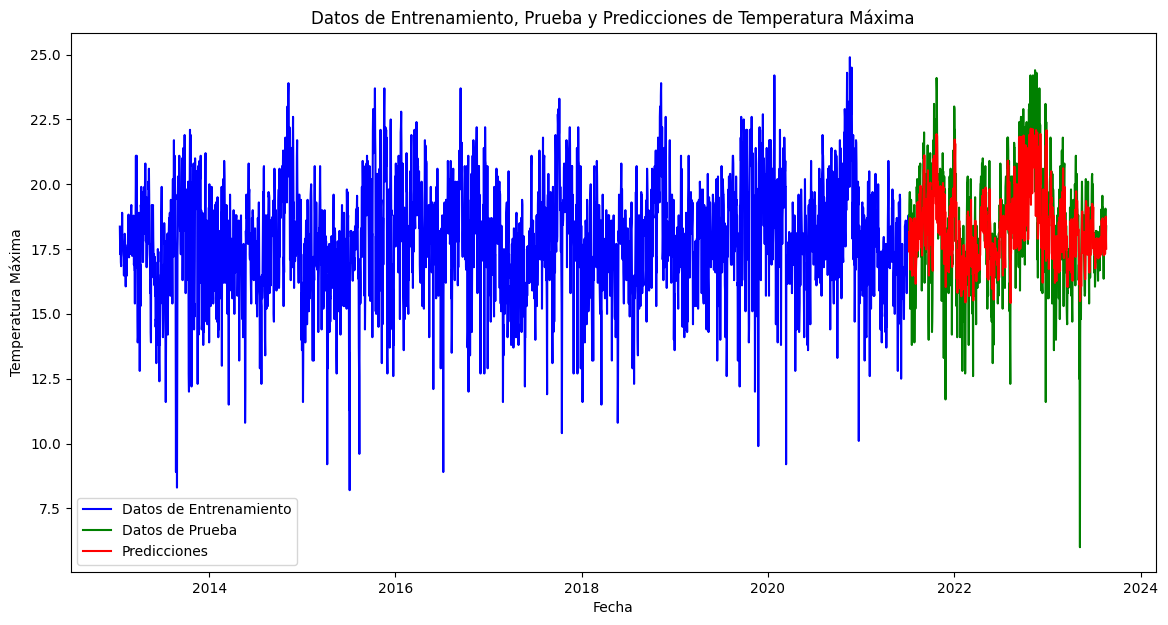

In [31]:
# Visualización de datos de entrenamiento, prueba y predicciones
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Datos de Entrenamiento', color='b')
plt.plot(y_test.index, y_test, label='Datos de Prueba', color='g')
plt.plot(y_test.index, y_pred_test, label='Predicciones', color='r', linestyle='-')
plt.title('Datos de Entrenamiento, Prueba y Predicciones de Temperatura Máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
plt.legend()
plt.show()

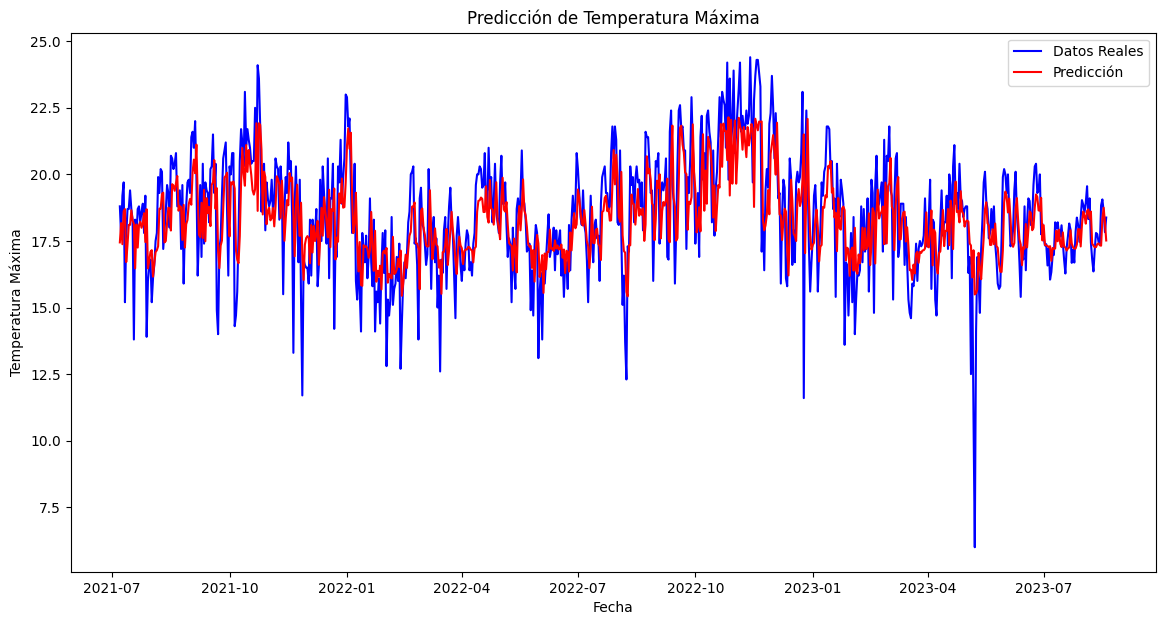

In [32]:
# Gráfica de comparación
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Datos Reales', color='b')
plt.plot(y_test.index, y_pred_test, label='Predicción', color='r')
plt.title('Predicción de Temperatura Máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
plt.legend()
plt.show()

### Future Predictions

In [33]:
# Generar predicciones hacia adelante
def predict_future(model, last_observation, n_steps):
    future_predictions = []
    current_observation = last_observation.copy()

    for _ in range(n_steps):
        prediction = model.predict(current_observation.values.reshape(1, -1))[0]
        future_predictions.append(prediction)

        # Actualizar la observación actual con la nueva predicción
        new_row = np.roll(current_observation.values, -1)
        new_row[-1] = prediction
        current_observation = pd.Series(new_row, index=current_observation.index)

    return future_predictions

# Realizar predicciones hacia adelante
n_future_steps = 365
last_observation = X_test.iloc[-1]  # Última observación del conjunto de prueba
future_predictions = predict_future(model, last_observation, n_future_steps)

# Visualización de predicciones futuras
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_future_steps, freq='D')
# future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_future_steps, freq='M')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

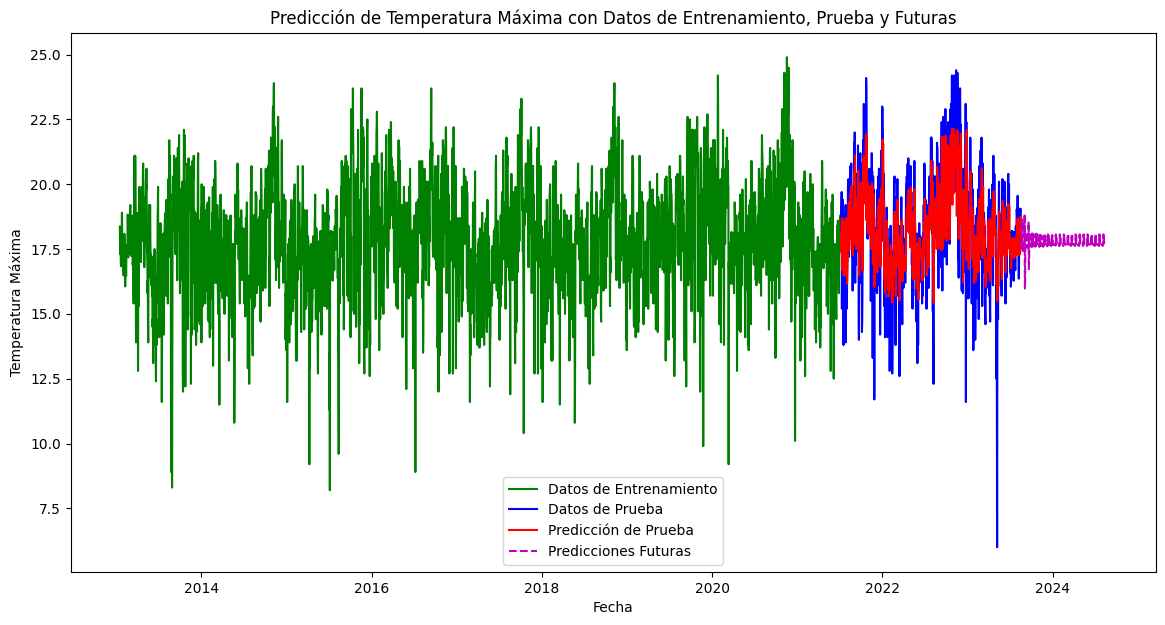

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Datos de Entrenamiento', color='g')
plt.plot(y_test.index, y_test, label='Datos de Prueba', color='b')
plt.plot(y_test.index, y_pred_test, label='Predicción de Prueba', color='r')
plt.plot(future_dates, future_predictions, label='Predicciones Futuras', color='m', linestyle='--')
plt.title('Predicción de Temperatura Máxima con Datos de Entrenamiento, Prueba y Futuras')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
plt.legend()
plt.show()

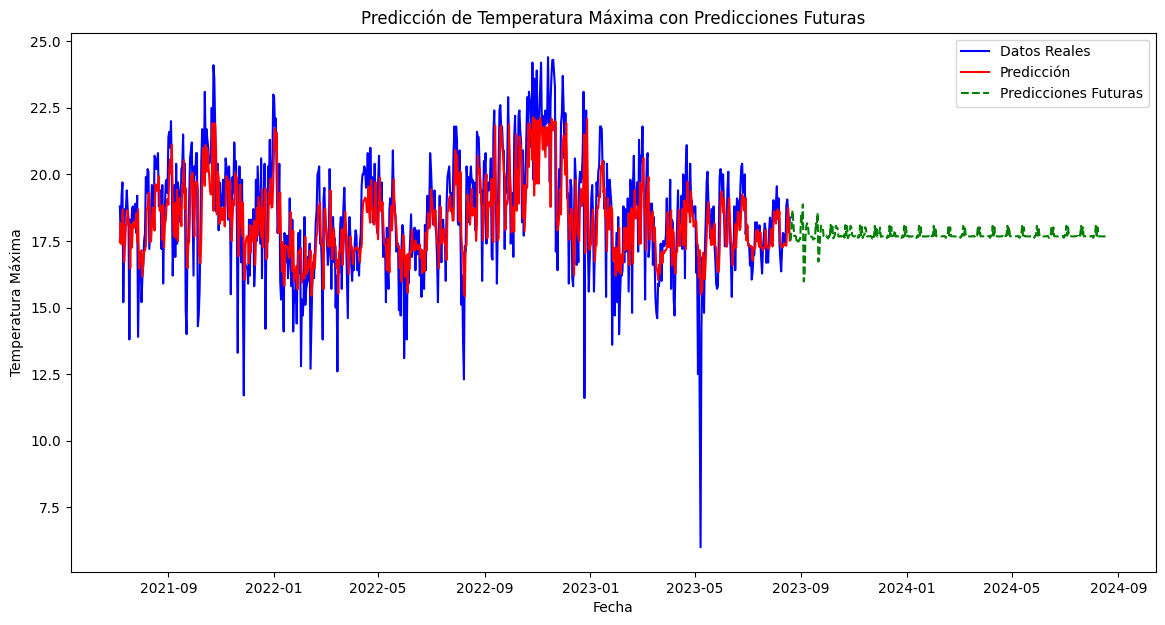

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Datos Reales', color='b')
plt.plot(y_test.index, y_pred_test, label='Predicción', color='r')
plt.plot(future_dates, future_predictions, label='Predicciones Futuras', color='g', linestyle='--')
plt.title('Predicción de Temperatura Máxima con Predicciones Futuras')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima')
plt.legend()
plt.show()

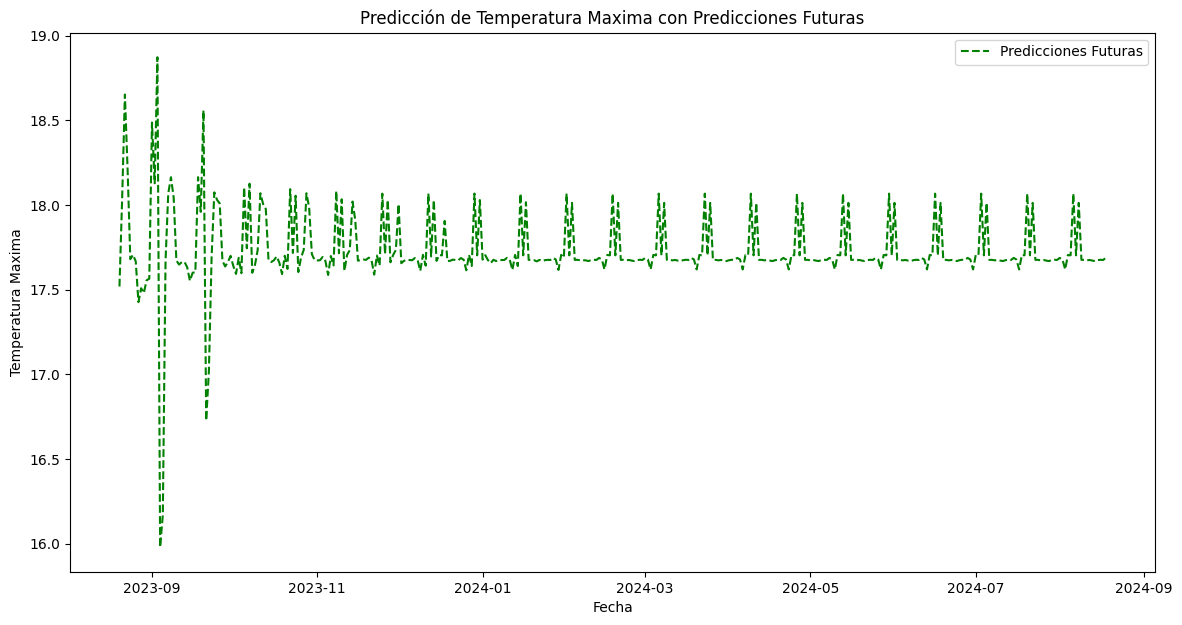

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(future_dates, future_predictions, label='Predicciones Futuras', color='g', linestyle='--')
plt.title('Predicción de Temperatura Maxima con Predicciones Futuras')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Maxima')
plt.legend()
plt.show()

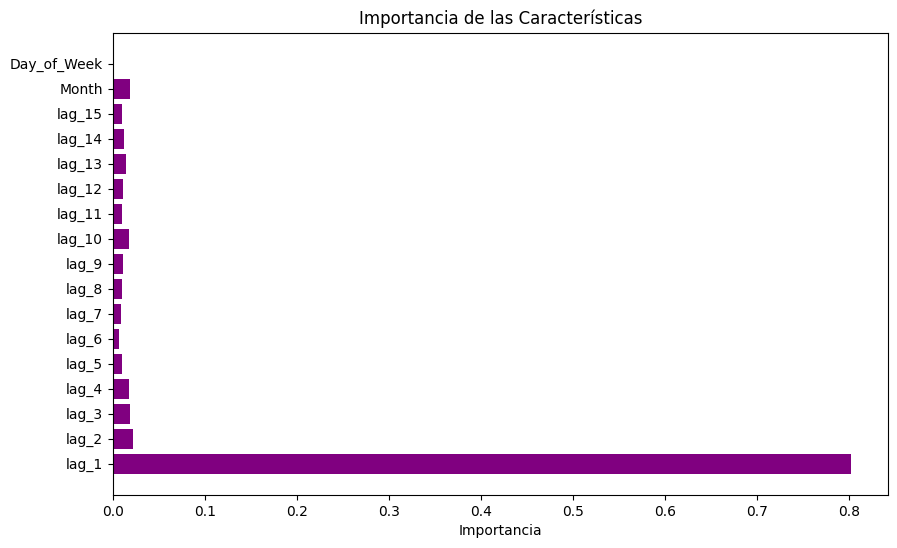

In [37]:
# Importancia de Características
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color="purple")
plt.xlabel("Importancia")
plt.title("Importancia de las Características")
plt.show()